PD (Probability Default): Probabilidad de que un cliente no pague.

LGD (Loss Given Default): % de pérdida en caso de impago.

EAD (Exposure at Default): Monto Expuesto en el momento de impago

EL (Expected Loss): EL = PD * LGD * EAD

In [2]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Modelado
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Evaluación
from sklearn.metrics import roc_auc_score, roc_curve

# Visualización
import matplotlib.pyplot as plt
# ----------------------------------
# 📦 IMPORTACIONES DEL MODELO
# ----------------------------------
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


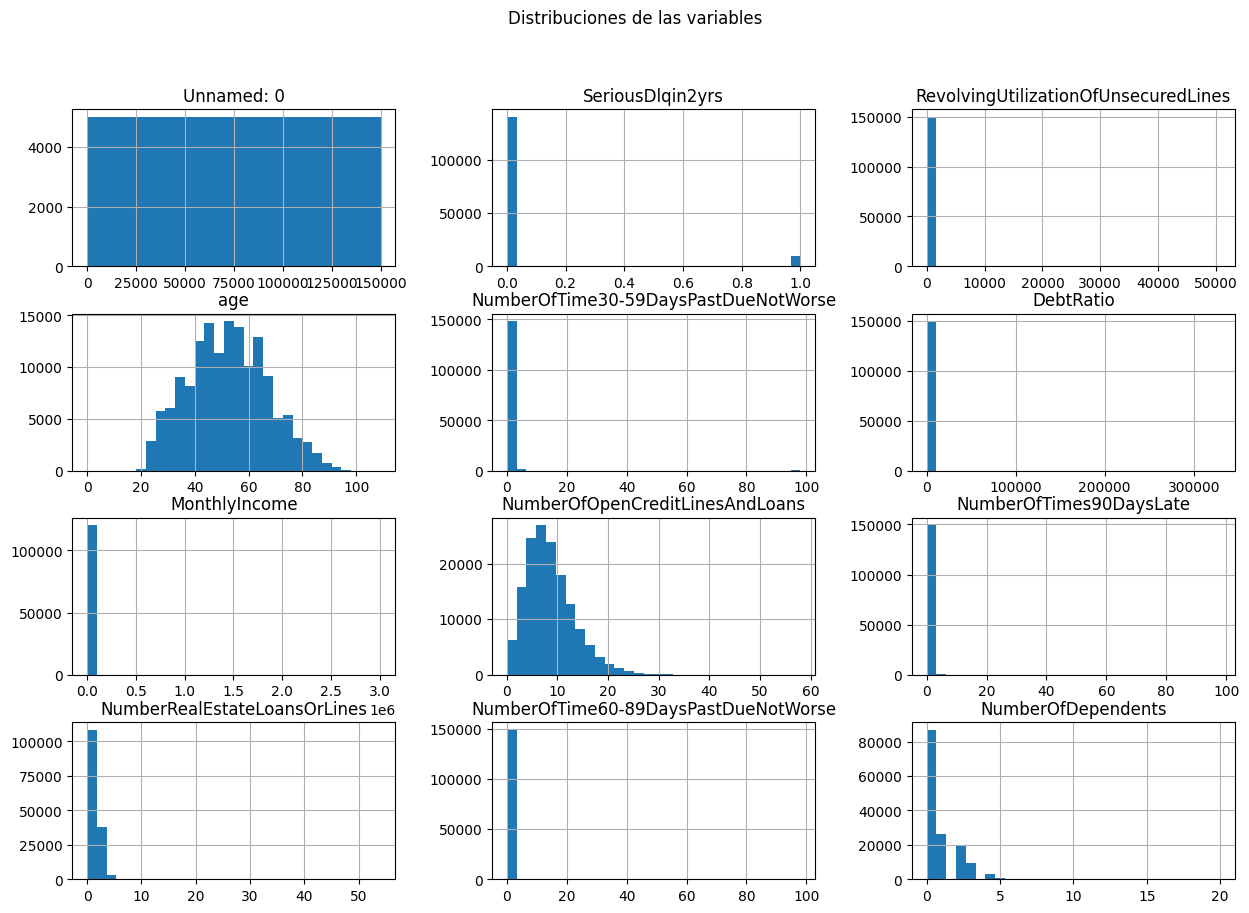

In [3]:
df = pd.read_csv(r'C:\Users\janbi\Desktop\Credit_Risk_Model\cs-training.csv\cs-training.csv')

print(df.columns)



df.hist(bins=30, figsize=(15,10))
plt.suptitle("Distribuciones de las variables")
plt.show()


| Variable                               | Qué significa                                   |
| -------------------------------------- | ----------------------------------------------- |
| `SeriousDlqin2yrs`                     | ⚠️ Target: 1 = impago en 2 años, 0 = no impago  |
| `RevolvingUtilizationOfUnsecuredLines` | Uso de tarjetas respecto al límite              |
| `age`                                  | Edad del cliente                                |
| `NumberOfTime30-59DaysPastDueNotWorse` | Número de veces que se retrasó 30-59 días       |
| `DebtRatio`                            | Ratio deuda / ingreso                           |
| `MonthlyIncome`                        | Ingresos mensuales                              |
| `NumberOfOpenCreditLinesAndLoans`      | Número de cuentas abiertas (tarjetas, créditos) |
| `NumberOfTimes90DaysLate`              | Número de veces que se retrasó más de 90 días   |
| `NumberRealEstateLoansOrLines`         | Hipotecas u otros préstamos inmobiliarios       |
| `NumberOfTime60-89DaysPastDueNotWorse` | Retrasos de 60-89 días                          |
| `NumberOfDependents`                   | Número de personas a su cargo                   |


In [4]:

train_df = pd.read_csv(r'C:\Users\janbi\Desktop\Credit_Risk_Model\cs-training.csv\cs-training.csv')


test_df = pd.read_csv(r'C:\Users\janbi\Desktop\Credit_Risk_Model\cs-test.csv\cs-test.csv')


In [34]:

train_df = train_df.drop(columns=["Unnamed: 0"], errors='ignore')

y_train = train_df["SeriousDlqin2yrs"]

X_train = train_df.drop(columns=["SeriousDlqin2yrs"])


(150000, 10) (150000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Imputar valores faltantes (NaN) con la mediana de cada columna
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)

print(X_train_imputed.shape, y_train.shape)

model = LogisticRegression(max_iter=10000)
model.fit(X_train_imputed, y_train)


(150000, 10) (150000,)


LogisticRegression(max_iter=10000)

AUC: 0.699


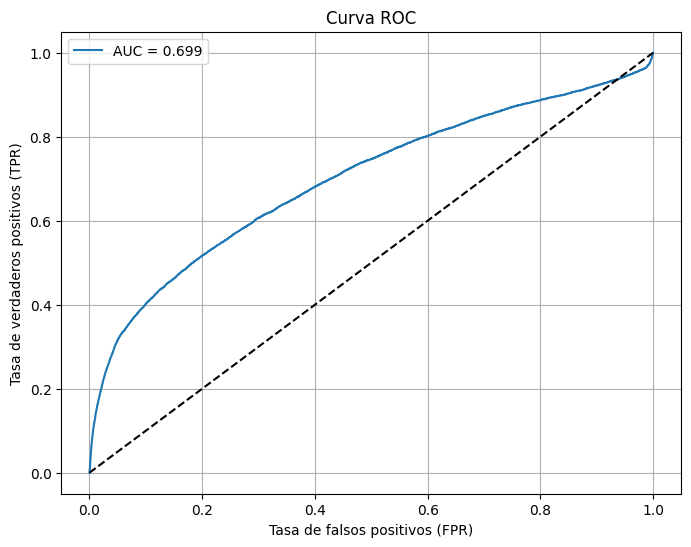

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


test_df = test_df.drop(columns=["Unnamed: 0"], errors='ignore')
y_test = test_df["SeriousDlqin2yrs"]
X_test = imputer.transform(test_df.drop(columns=["SeriousDlqin2yrs"]))

y_pred_prob_valid = model.predict_proba(X_train_imputed)[:, 1] 


y_train = y_train.reset_index(drop=True)


auc = roc_auc_score(y_train, y_pred_prob_valid)
print(f"AUC: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_train, y_pred_prob_valid)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_val, y_val_prob)
print(f"AUC: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_val, y_val_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()


VALORACIÓN DEL MODELO:

AUC (Area Under Curve): Discriminación del modelo (0.5 = aleatorio, 1 = perfecto)

KS (Kolmogorov-Smirnov): Màxima diferenica entre tasa de positivos y negativos acumulados.

ROC Curve: tasa verdaderos positivos vs falsos positivos

Accuracy: % tasa de aciertos (no és útil si no tienes 50/50 )